In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os

path = os.getcwd() + '/Assignments/1/ex1/ex1data1.txt'
data = pd.read_csv(path,header=None, names= ['Population','Profit'])
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
path =os.getcwd()
print (path)

/home/nikseddu/Desktop/andrew_ml/Andrew-Machine-Learning-Python


In [4]:
#Names  is used as the cols name as there is no header in the data

In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


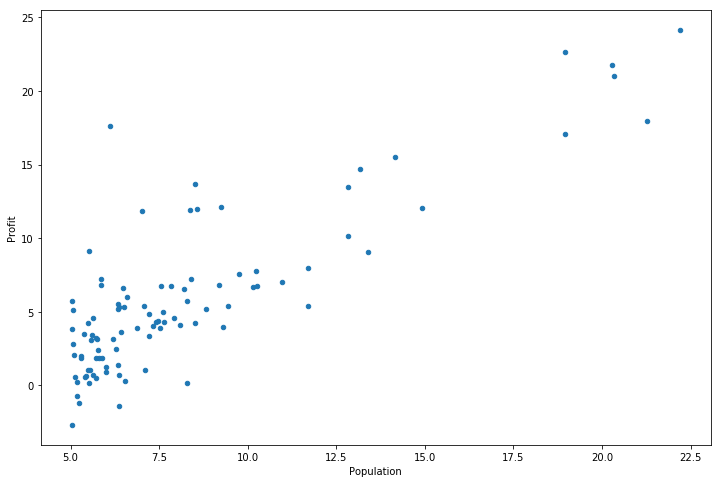

In [6]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [7]:
data.insert(0, 'ones', 1)
#data.head()

In [8]:
cols = data.shape[1] # count total nnumber of cols
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]


In [9]:
#.iloc[] is primarily integer position based (from 0 to length-1 of the axis)
# insert is to add col at index 0 with 'ones' as label and 1 as all the values


In [10]:
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [11]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [12]:
X = np.matrix(X.values) 
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [13]:
#converting numpy arrays to  numpy Matrices. As these are to used inside compute cost function


In [14]:
theta


matrix([[0, 0]])

In [15]:
def computeCost(X,y,theta):
    inner =  np.power(((X * theta.T)-y),2)
    return np.sum(inner)/(2 * len(X))

In [16]:
computeCost(X,y,theta)

32.072733877455676

Added Mean squared error function

In [17]:
def gradientDescent(X,y,theta,alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) # Temporary matrix of size theta containing zeroes
    parameters  = int(theta.ravel().shape[1]) # To count how many thetas values are there/ column size 
    cost = np.zeros(iters) # creating an array of size iters to store cost
    
    for i in range(iters):
        error = (X * theta.T)-y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j] - ((alpha/len(X))*np.sum(term))
        
        theta = temp
        cost[i] =  computeCost(X,y,theta)
    
    return theta, cost


In [18]:
alpha = 0.01
iters = 1000

In [19]:
g, cost =  gradientDescent(X,y,theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [20]:
cost

array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
       5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
       5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
       5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
       5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
       5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
       5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
       5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
       5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
       5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
       5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
       5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
       5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
       5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
       5.59062326, 5.58661195, 5.58261509, 5.57863263, 5.57466

In [21]:
computeCost(X, y,g) # finally computing the price. 32.7  4.51

4.515955503078912

Visualing Everything with the graphs


Text(0.5,1,'Predicted Profit vs. Population Size')

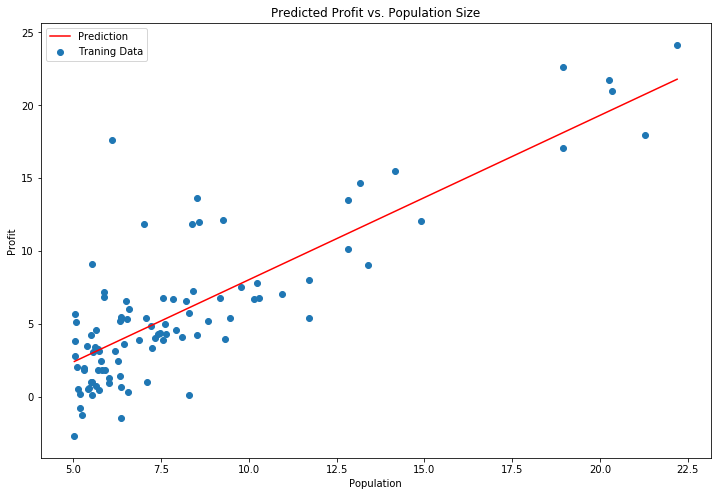

In [22]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')